### Perceptron

From [brilliant.org](https://brilliant.org/practice/perceptron-limitations/?chapter=perceptrons):

The **perceptron** algorithm **divides a vector space into two classes**. Colloquially speaking, for it to succeed on all points in training data, the **points must be completely separable**. This is known as **linear separability**, as we seek to find lines (or higher-dimensional equivalents) that correctly classify all of the data.

The reason we use linear models is that they have many nice properties. For example, linear models are simple and have few parameters to learn, thus requiring less training data to learn reliably. Moreover, linear models are visually and intuitively appealing, providing intuition on understanding the structure of the decision boundaries. However, because they’re so simple, the perceptron algorithm has several **limitations**:

* perceptron algorithm **doesn't perform well on non-linearly** separable data

* **outliers** greatly affect its convergence rate

* resulting **hyperplane might not be the best one**

(see section Limitations of perceptron).

<img src='img/nn_pic1.png' width='300'>

#### Define `perceptron`

In [81]:
import numpy as np

def perceptron(w, x, y, i, iteration, max_i, cycle_error,
              print_details=False):
    """
    function emulating the logic of perceptron
    
    loss function is calculated as [[ y_i*(w dot x_i + b) <= 0 ]]
    if misclassified (loss == True), adjust weights and bias
    call the algorithm recursively until 'max_iterations' is reached
    
    param: w   -- np.array -- vector of weights (free term 'b' is included)
    param: x   -- np.array -- array of vectors (arrays) of inputs
                              (free term 'b' is included)
    param: y   -- boolean  -- array of labelled results
    param: i   -- int      -- current data point
    param: iteration -- int -- current iteration of the algorithm
    param: max_i     -- int -- max number of iterations allowed
    param: cycle_error -- float -- sum of all errors in this cycle
    
    kwarg: print_details -- boolean -- print details of each iteration
                                       (default=False)
    
    global variable: losses -- int -- number of losses 
                                      (updated by this function)
    global variable: runs   -- int -- number of iterations
                                      (updated by this function)
    global variable: cycle -- int  -- current cycle
                                      (updated by this function)
    global variable: error_dict -- dict -- dictionary with total error
                                           from each cycle
    
    returns: perceptron(w, x, y, i) -- recursively calls itself
                                                  until 'max_i'
                                                  is reached
    """
    # global variables -- number of losses, number of runs
    global losses, runs, cycle, error_dict
    
    # print headers
    if iteration == 0: print("\n----- Perceptron -----")
      
    # classification -- w dot x_i (term 'b' included as last in 'w' and 'x')
    classi = w.dot(x[i])
    
    # calculate the loss function
    loss = y[i] * classi <= 0
    
    if print_details:
        print("\n---Iteration #", iteration, ":")
        print("loss({0}) = y_i({1}) * w({2}) dot x_i({3})"
              .format(loss, y[i], w, x[i]))
        print("w dot x_i = ", classi)
    
    # if misclassified, adjust weights
    if loss:
        # add error to 'cycle_error'
        cycle_error += abs(classi)
        # THIS PART MIGHT CAUSE ERRORS DUE TO +=
        w += y[i] * x[i] # adjust vector of weights
        losses += 1
        
        if print_details:
            print("Error =", abs(classi))
            print("Adjusted wights:", w)
    
    # count iterations
    iteration += 1
    runs = iteration
    # move to next data point
    i += 1
    # reset 'i', if reached the end of 'x'
    if i == len(x):
        print("\n--Cycle #{0} completed. From {1:,} records, {2:,}({3:.2f}%) \
were misclassified.\n".format(cycle, i, losses, losses / i * 100))
        print("Total cycle error =", cycle_error)
        if losses == 0:
            print("No records misclasified on this cycle. Exiting...")
            return
        losses = 0      # reset losses for the next cycle
        error_dict[cycle] = cycle_error # add cycle error to global 'error_dict'
        cycle_error = 0 # reset error for the next cycle
        i = 0           # reset 'i' for the next cycle
        cycle += 1      # count cycles
        
    # continue until 'max_iterations' is reached
    if i < max_i:
        return perceptron(w, x, y, i, iteration, max_i, cycle_error, 
                          print_details=print_details)
    else:
        print("Max iterations reached, stopping...")
        return

#### Define `plot_error`

In [114]:
from pandas import Series
import matplotlib.pyplot as plt

def plot_error():
    """
    function to plot error from each cycle
    """
    global error_dict
    error_se = Series(error_dict)
    
    f, ax = plt.subplots(1, figsize=(6, 6))
    ax.set_title("Total error by cycle")
    ax.set_xlabel("Cycle number")
    ax.set_ylabel("Sum of abs of all errors")
    ax.set_xticks(np.arange(len(error_se) + 1))
    plt.plot(error_se, color='red')
    ax.fill_between(x=error_se.index, y1=error_se, y2=0, 
                    color='red', alpha=0.1)
    plt.show()

#### No bias term

Starting weights -- vector w(0): [0. 0. 0.]

Data points -- vectors x_i:
 [[-1.  1.  1.]
 [ 0. -1.  1.]
 [10.  1.  1.]]

Results -- set of y: [ 1. -1.  1.]

----- Perceptron -----

---Iteration # 0 :
loss(True) = y_i(1.0) * w([0. 0. 0.]) dot x_i([-1.  1.  1.])
w dot x_i =  0.0
Error = 0.0
Adjusted wights: [-1.  1.  1.]

---Iteration # 1 :
loss(True) = y_i(-1.0) * w([-1.  1.  1.]) dot x_i([ 0. -1.  1.])
w dot x_i =  0.0
Error = 0.0
Adjusted wights: [-1.  2.  0.]

---Iteration # 2 :
loss(True) = y_i(1.0) * w([-1.  2.  0.]) dot x_i([10.  1.  1.])
w dot x_i =  -8.0
Error = 8.0
Adjusted wights: [9. 3. 1.]

--Cycle #1 completed. From 3 records, 3(100.00%) were misclassified.

Total cycle error = 8.0

---Iteration # 3 :
loss(True) = y_i(1.0) * w([9. 3. 1.]) dot x_i([-1.  1.  1.])
w dot x_i =  -5.0
Error = 5.0
Adjusted wights: [8. 4. 2.]

---Iteration # 4 :
loss(False) = y_i(-1.0) * w([8. 4. 2.]) dot x_i([ 0. -1.  1.])
w dot x_i =  -2.0

---Iteration # 5 :
loss(False) = y_i(1.0) * w([8. 4. 2.]

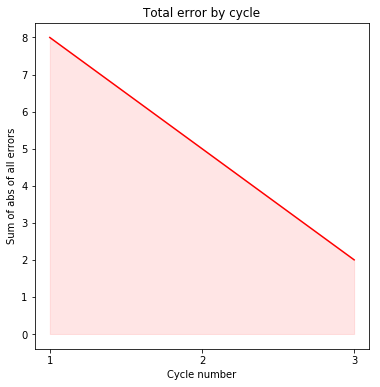

In [118]:
i = 0                # variable to track current data point
cycle = 1        # variable to track number of the cycle
iteration = 0        # starting value for iteration tracking
max_i = 100           # max iterations allowed 
losses = 0           # var to track number of losses per cycle, updated by func
cycle_error = 0      # var to track total cycle error
runs = 0             # var to track total number of runs, updated by function
error_dict = dict()  # dictionary to store total error from each cycle

# starting vector of weights 
# (last coordinate represents 'b' from 'w * x_i + b')
w = np.array([0., 0., 0.])

# set of vectors of points (last coordinate represents 'b' from 'w * x_i + b')
x = np.array(
    [np.array([-1., 1., 1.]),
     np.array([0., -1., 1.]),
     np.array([10, 1., 1.])]
    )

# set of results
y = np.array([1., -1., 1.])

print("Starting weights -- vector w(0):", w)
print("\nData points -- vectors x_i:\n", x)
print("\nResults -- set of y:", y)

perceptron(w, x, y, i, iteration, max_i, cycle_error, print_details=True)
plot_error()

#### Training sets with outliers

Starting weights -- vector w(0): [0 0 0]

Data points -- vectors x_i:
 [[-1  1  1]
 [ 0 -1  1]
 [10  1  1]]

Results -- set of y: [ 1 -1  1]

----- Perceptron -----

---Iteration # 0 :
loss(True) = y_i(1) * w([0 0 0]) dot x_i([-1  1  1])
w dot x_i =  0
Error = 0
Adjusted wights: [-1  1  1]

---Iteration # 1 :
loss(True) = y_i(-1) * w([-1  1  1]) dot x_i([ 0 -1  1])
w dot x_i =  0
Error = 0
Adjusted wights: [-1  2  0]

---Iteration # 2 :
loss(True) = y_i(1) * w([-1  2  0]) dot x_i([10  1  1])
w dot x_i =  -8
Error = 8
Adjusted wights: [9 3 1]

--Cycle #1 completed. From 3 records, 3(100.00%) were misclassified.

Total cycle error = 8

---Iteration # 3 :
loss(True) = y_i(1) * w([9 3 1]) dot x_i([-1  1  1])
w dot x_i =  -5
Error = 5
Adjusted wights: [8 4 2]

---Iteration # 4 :
loss(False) = y_i(-1) * w([8 4 2]) dot x_i([ 0 -1  1])
w dot x_i =  -2

---Iteration # 5 :
loss(False) = y_i(1) * w([8 4 2]) dot x_i([10  1  1])
w dot x_i =  86

--Cycle #2 completed. From 3 records, 1(33.33%) were 

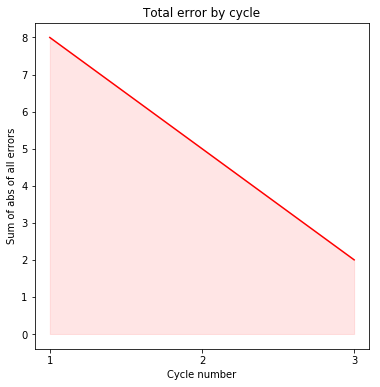

In [119]:
i = 0                # variable to track current data point
cycle = 1        # variable to track number of the cycle
iteration = 0        # starting value for iteration tracking
max_i = 100           # max iterations allowed 
losses = 0           # var to track number of losses per cycle, updated by func
cycle_error = 0      # var to track total cycle error
runs = 0             # var to track total number of runs, updated by function
error_dict = dict()  # dictionary to store total error from each cycle

# starting vector of weights 
# (last coordinate represents 'b' from 'w * x_i + b')
w = np.array([0, 0, 0])

# set of vectors of points (last coordinate represents 'b' from 'w * x_i + b')
x = np.array(
    [np.array([-1, 1, 1]),
     np.array([0, -1, 1]),
     np.array([10, 1, 1])]
    )

# set of results
y = np.array([1, -1, 1])

print("Starting weights -- vector w(0):", w)
print("\nData points -- vectors x_i:\n", x)
print("\nResults -- set of y:", y)

perceptron(w, x, y, i, iteration, max_i, cycle_error, print_details=True)
plot_error()

Intuitively, an outlier causes the perceptron weight values to ‘overcorrect’ for misclassifying the outlier, and so it could takes more iterations to account for this.

This is also evident from an earlier computation. In the case with no bias term (a hyperplane through the origin), each step changed the signed distance from a misclassified point to the boundary by $|x|^2$. Thus, outliers far from the hyperplane will cause very large changes, and the algorithm will accordingly take longer to converge.

#### Influence of initialization values

Given two different initialization values (for weights and bias), but the same training data, is this learning algorithm guaranteed to converge to the same weight and bias parameters?

**Starting at $w(0) = \binom{5}{5}$ and $b(5) = 0$**

Starting weights -- vector w(0): [5 5 5]

Data points -- vectors x_i:
 [[-1  1  1]
 [ 0 -1  1]
 [10  1  1]]

Results -- set of y: [ 1 -1  1]

----- Perceptron -----

--Cycle #1 completed. From 3 records, 1(33.33%) were misclassified.

Total cycle error = 0

--Cycle #2 completed. From 3 records, 0(0.00%) were misclassified.

Total cycle error = 0
No records misclasified on this cycle. Exiting...


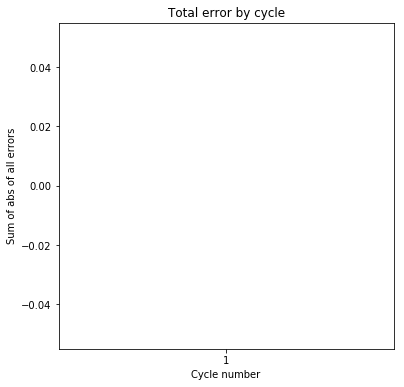

In [121]:
i = 0                # variable to track current data point
cycle = 1        # variable to track number of the cycle
iteration = 0        # starting value for iteration tracking
max_i = 100           # max iterations allowed 
losses = 0           # var to track number of losses per cycle, updated by func
cycle_error = 0      # var to track total cycle error
runs = 0             # var to track total number of runs, updated by function
error_dict = dict()  # dictionary to store total error from each cycle

# starting vector of weights 
# (last coordinate represents 'b' from 'w * x_i + b')
w = np.array([5, 5, 5])

# set of vectors of points (last coordinate represents 'b' from 'w * x_i + b')
x = np.array(
    [np.array([-1, 1, 1]),
     np.array([0, -1, 1]),
     np.array([10, 1, 1])]
    )

# set of results
y = np.array([1, -1, 1])

print("Starting weights -- vector w(0):", w)
print("\nData points -- vectors x_i:\n", x)
print("\nResults -- set of y:", y)

perceptron(w, x, y, i, iteration, max_i, cycle_error)
plot_error()

**Converged to a different point**

**Starting at $w(0) = \binom{-13}{-7}$ and $b(0) = 1$**

Starting weights -- vector w(0): [-13  -7   1]

Data points -- vectors x_i:
 [[-1  1  1]
 [ 0 -1  1]
 [10  1  1]]

Results -- set of y: [ 1 -1  1]

----- Perceptron -----

--Cycle #1 completed. From 3 records, 2(66.67%) were misclassified.

Total cycle error = 144

--Cycle #2 completed. From 3 records, 3(100.00%) were misclassified.

Total cycle error = 49

--Cycle #3 completed. From 3 records, 2(66.67%) were misclassified.

Total cycle error = 10

--Cycle #4 completed. From 3 records, 2(66.67%) were misclassified.

Total cycle error = 5

--Cycle #5 completed. From 3 records, 2(66.67%) were misclassified.

Total cycle error = 0

--Cycle #6 completed. From 3 records, 0(0.00%) were misclassified.

Total cycle error = 0
No records misclasified on this cycle. Exiting...


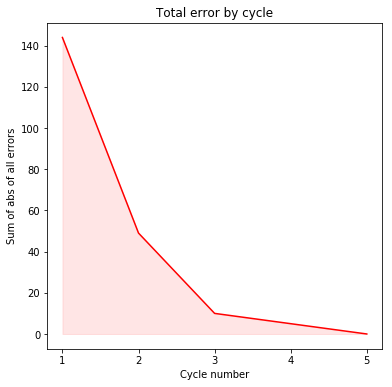

In [123]:
i = 0                # variable to track current data point
cycle = 1        # variable to track number of the cycle
iteration = 0        # starting value for iteration tracking
max_i = 100           # max iterations allowed 
losses = 0           # var to track number of losses per cycle, updated by func
runs = 0             # var to track total number of runs, updated by function
error_dict = dict()  # dictionary to store total error from each cycle

# starting vector of weights 
# (last coordinate represents 'b' from 'w * x_i + b')
w = np.array([-13, -7, 1])

# set of vectors of points (last coordinate represents 'b' from 'w * x_i + b')
x = np.array(
    [np.array([-1, 1, 1]),
     np.array([0, -1, 1]),
     np.array([10, 1, 1])]
    )

# set of results
y = np.array([1, -1, 1])

print("Starting weights -- vector w(0):", w)
print("\nData points -- vectors x_i:\n", x)
print("\nResults -- set of y:", y)

perceptron(w, x, y, i, iteration, max_i, cycle_error)
plot_error()

**Converged to a different point**

This highlights an **important limitation of perceptron** - while we can find a hyperplane that linearly separates the data, we don’t know this hyperplane is even the best one. 

#### Limitations of perceptron

A massive drawback of the naive perceptron learning algorithm is that it **will not converge if the training data are not linearly separable**. Our naive perceptron algorithm can't classify data that is not linearly separable, but we can get around this.

Previously, we iterated $w$ and $b$ until there were no more errors. Since we know we'll never get no errors, every time we update $w$ calculate its error rate on all the data. We could introduce a condition that if we do not see an improvement greater than some small value of $\gamma$ over the past $N$ iterations, we could consider our weights and bias final. 

#### Hinge loss function

Consider another example of perceptron that perfectly classifies the data but is unlikely to generalize well:

<img src='img/nn_pic2.png' width=300>

Intuitively, a better solution for the hyperplane would lie closer to the "middle" of the two sets of points. In order to ensure this, we need to measure errors in a more refined manner than simply counting misclassified points.

One possible loss function is known as **hinge loss**:

$ L(x_i, y_i, w, b) = \max{\{0, 1 - y_i(w\cdot{x_i} + b)}\} $

The basic idea is that we will have a greater loss if the point is farther from the right side of the boundary- and we'll even penalize points which are "barely" correctly classified.

Geometrically, we are introducing parallel boundaries around the decision boundary known as the margin boundaries. In order for a point to get 0 loss, it would have to be both on the correct side of the decision boundary and outside of the margin boundaries.

<img src='img/nn_pic3.png' width=300>

The positive training point outside the margin would have 0 hinge loss, while the positive training point inside the margin - while classified correctly, would still incur some small loss. 

Hinge loss penalizes dividing lines which are close to the points they're classifying, even when those points are on the correct side. So, the best classifier is going to be one with that's fairly far from every data point

While we want to minimize the hinge loss, $L$, we also saw earlier that the perceptron algorithm is greatly influenced by outliers.

Thus, we want to minimize the hinge loss, but we also don't want to make our update of $w(k-1)\to w(k)$ too large in a given step (i.e., to be overly impacted by an outlier).

#### Basis functions

The perceptron algorithm gives us a way to draw a line between two groups of points. In order to be able to converge and successfully separate the groups, this requires that there exists a line that successfully separates them. We say that such a line exists if two groups of points are linearly separable. Thus, perceptron algorithm cannot converge if the two groups are not linearly separable.

However, when two groups of points are not linearly separable, there may be a way to transform the coordinates under which we get linearly separable points. These transformations are called basis functions, and can be anything. For instance, suppose you have points $(x, y)$, then you could map these to the one-dimensional point $\phi((x, y)) = y - x$.

##### Example of data that is not separated linearly

If we encounter the following data pattern,

<img src='img/nn_pic4.png' width=300>

we can apply **polar transformation** to the data so as to make the points linearly separable. If we solve the following equations for $(r, \theta)$:

$x = r \cos{\theta}$

$y = r \sin{\theta},~\theta \in [0, 2\pi]$

and plot the results on an $(r, \theta)$ plane, we obtain the following:

<img src='img/nn_pic5.png' width=400>

##### Another example of data that is not separated linearly

This data is not linearly separable:

<img src='img/nn_pic6.png' width-300>

But once again, we can apply transformation $ x \mapsto x^2 $ to make this data linearly separable. The transformation $x \mapsto x^2$ works since it effectively utilizes the "dimension" that separates the points--namely its sign. Monotonically increasing functions like $x^3$, $e^x$ don't do that. $\text{sgn}(x)$ does utilize the sign dimension, but it loses the "size" dimension.

#### The universal approximation theorem

In the last two problems, we relied on our mathematical intuition to find basis functions under which the data became linearly separable. In general, though, we'd love to have a way to automatically generate basis functions for any dataset.

The **universal approximation theorem** gives us an inspiration for such functions. Let $f(x)$ be a continuous function where $x$ may be a multidimensional vector, and let $\sigma$ be the logistic function. Then, the universal approximation theorem tells us that there exists an $N$ for which we can write

$ F(x) = \sum \limits_{i=1}^N c_i \sigma (\omega_i \cdot{x} + b_i) $

such that $|F(x) - f(x)| < \epsilon$ for all $x$.

Here, $c_i$ and $b_i$ are arbitrary constants, while $\omega_i$ is a vector of the same size as $N$. Additionally, $\epsilon$ is an arbitrarily small value.

The main takeaway of the theorem is that **we can approximate an arbitrarily complex function** (which may be a **decision boundary**) arbitrarily well **by summing together many logistic functions**. This tells us that a more complicated model, such as the multistage perceptron, should be able to approximate significantly more complicated functions.